In [321]:
import csv

# Read metrics for "New Algorithm"
with open('new/metrics-new.txt', 'r') as f:
    results_new = list(csv.DictReader(f, delimiter=',', quotechar='|'))

# Read metrics for "Pattern Algorithm"
with open('pattern/metrics-pattern.txt', 'r') as f:
    results_pattern = list(csv.DictReader(f, delimiter=',', quotechar='|'))

In [322]:
import matplotlib.pyplot as plt
import re

colors = ['blue', 'green', 'red', 'yellow', 'orchid', 'gray', 'black']
def extract_type(name):
    return "_".join(re.findall(r"[a-zA-Z]+", name))
    
# Metrics for "New Algorithm"
types_new = list(map(lambda x: extract_type(x['name']), results_new)) 
nodes_new = list(map(lambda x: float(x['nodes']), results_new))
edges_new = list(map(lambda x: float(x['edges']), results_new))
count_of_cliques_received_new = list(map(lambda x: float(x['cliques']), results_new))
calls_made_new = list(map(lambda x: float(x['calls']), results_new))
time_new = list(map(lambda x: float(x["time"]), results_new))
size_new = list(map(lambda x: x[0] + x[1], zip(edges_new, nodes_new)))
average_degree_new = list(map(lambda x: 2*x[0]/x[1] if x[1] != 0 else -1, zip(edges_new, nodes_new)))
densities_new = list(map(lambda x: x[0]/(x[1]*(x[1]-1))  if x[1] != 0 else -1, zip(edges_new, nodes_new)))


# Metrics for "Pattern Algorithm"
types_pattern = list(map(lambda x: extract_type(x['name']), results_pattern)) 
nodes_pattern = list(map(lambda x: float(x['nodes']), results_pattern))
edges_pattern = list(map(lambda x: float(x['edges']), results_pattern))
count_of_cliques_received_pattern = list(map(lambda x: float(x['cliques']), results_pattern))
calls_made_pattern = list(map(lambda x: float(x['calls']), results_pattern))
time_pattern = list(map(lambda x: float(x["time"]), results_pattern))
size_pattern = list(map(lambda x: x[0] + x[1], zip(edges_pattern, nodes_pattern)))
average_degree_pattern = list(map(lambda x: (2*x[0])/x[1] if x[1] != 0 else -1, zip(edges_pattern, nodes_pattern)))
densities_pattern = list(map(lambda x: x[0]/(x[1]*(x[1]-1)) if x[1] != 0 else -1, zip(edges_pattern, nodes_pattern)))


dictionary_of_colors = { type_of_graph: color for type_of_graph, color in zip(set(types_new), colors)} 


colors_new = list(map(lambda x: dictionary_of_colors[x], types_new))
colors_pattern = list(map(lambda x: dictionary_of_colors[x], types_pattern))

# The following two lines generate custom fake lines that will be used as legend entries:
fake_markers_for_legend = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in dictionary_of_colors.values()]


In [323]:
if set(types_new) != set(types_pattern):
    raise Exception('not same types')

## Density vs. Recursive calls made

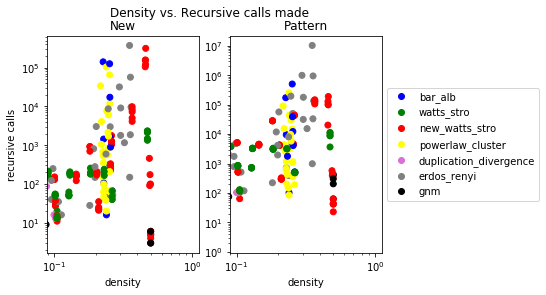

In [324]:
fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Density vs. Recursive calls made')

# "New Algorithm"
ax_new.scatter(densities_new, calls_made_new, c=colors_new)
ax_new.set(xlabel='density', ylabel='recursive calls')
ax_new.set(xscale='log', yscale='log')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.scatter(densities_pattern, calls_made_pattern, c=colors_pattern)
ax_pattern.set(xlabel='density')
ax_pattern.set(xscale='log', yscale='log')
ax_pattern.set_title('Pattern')

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/density_recur_calls")


plt.show()

# Average degree vs. Recursive calls made

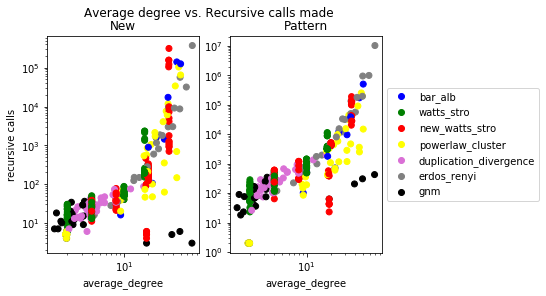

In [325]:

fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Average degree vs. Recursive calls made')

# "New Algorithm"
ax_new.scatter(average_degree_new, calls_made_new, c=colors_new)
ax_new.set(xlabel='average_degree', ylabel='recursive calls')
ax_new.set(xscale='log', yscale='log')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.scatter(average_degree_pattern, calls_made_pattern, c=colors_new)
ax_pattern.set(xlabel='average_degree')
ax_pattern.set(xscale='log', yscale='log')
ax_pattern.set_title('Pattern')

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/average_degree_recur_calls")

plt.show()

## Size vs. Recursive calls made

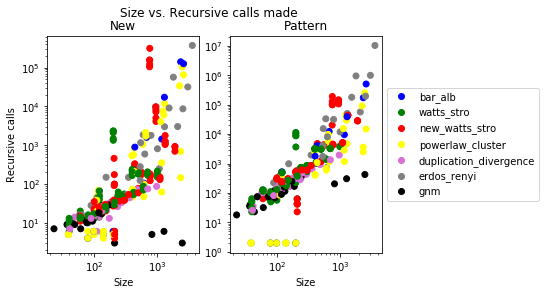

In [326]:
fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Size vs. Recursive calls made')

# "New Algorithm"
ax_new.scatter(size_new, calls_made_new, c=colors_new)
ax_new.set(xlabel='Size', ylabel='Recursive calls')
ax_new.set(xscale='log', yscale='log')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.scatter(size_pattern, calls_made_pattern, c=colors_new)
ax_pattern.set(xlabel='Size')
ax_pattern.set(xscale='log', yscale='log')
ax_pattern.set_title('Pattern')

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/size_recur_calls")

plt.show()

## Density vs. Recursive calls made (DIFF)

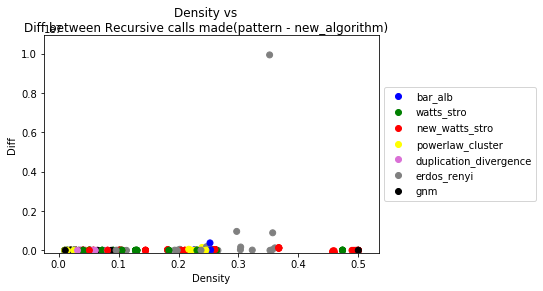

In [327]:
fig, ax = plt.subplots()

fig.suptitle('Density vs\nDiff between Recursive calls made(pattern - new_algorithm)')

diff = list(map(lambda e: int(e[0] - e[1]), zip(calls_made_pattern, calls_made_new)))

ax.scatter(densities_new, diff, c=colors_new)
ax.set(xlabel='Density', ylabel='Diff')
ax.set(ylim=(min(diff) - 10, max(diff) * 1.10))

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/density_recur_calls_diff")

plt.show()

# Average degree vs. Recursive calls made (DIFF)


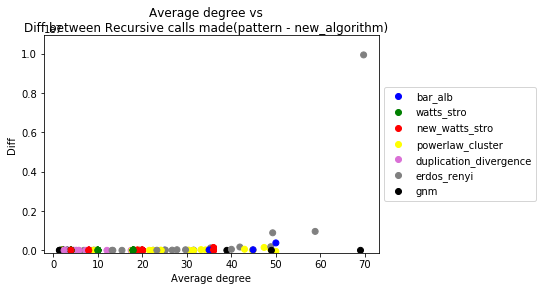

In [328]:
fig, ax = plt.subplots()

fig.suptitle('Average degree vs\nDiff between Recursive calls made(pattern - new_algorithm)')

diff = list(map(lambda e: e[0] - e[1], zip(calls_made_pattern, calls_made_new)))

ax.scatter(average_degree_new, diff, c=colors_new)
ax.set(xlabel='Average degree', ylabel='Diff')
#ax.set(yscale='log', ylim=(min(diff)/10, max(diff)*10))
ax.set(ylim=(min(diff) - 10, max(diff) * 1.10))

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/average_degree_recur_calls_diff")

plt.show()

## Size vs. Recursive calls made (DIFF)

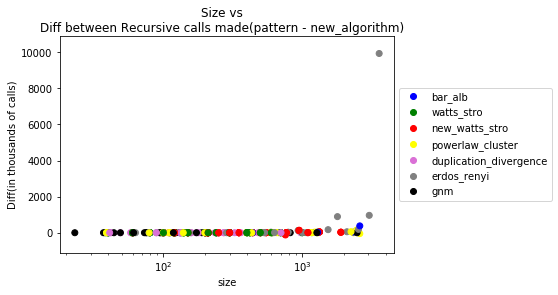

In [353]:
fig, ax = plt.subplots()

fig.suptitle('Size vs\nDiff between Recursive calls made(pattern - new_algorithm)')

diff = list(map(lambda e: (e[0] - e[1])/1000, zip(calls_made_pattern, calls_made_new)))

ax.scatter(size_new, diff, c=colors_new)
ax.set(xlabel='size', ylabel='Diff(in thousands of calls)')
ax.set(xscale='log')
ax.set(ylim=(min(diff) - 1000 , max(diff) * 1.10))

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/size_recur_calls_diff")

plt.show()

## Recursive calls made in _pattern_ vs. Recursive calls made (DIFF)

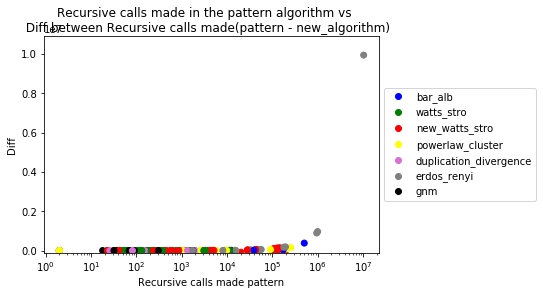

In [330]:
fig, ax = plt.subplots()

fig.suptitle('Recursive calls made in the pattern algorithm vs \n Diff between Recursive calls made(pattern - new_algorithm)')

diff = list(map(lambda e: e[0] - e[1], zip(calls_made_pattern, calls_made_new)))

ax.scatter(calls_made_pattern, diff, c=colors_pattern)
ax.set(xlabel='Recursive calls made pattern', ylabel='Diff')
ax.set(xscale='log', ylim=(min(diff) - 10, max(diff) * 1.10))

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/recur_calls_diff_vs_recursive_calls_pattern")

plt.show()

## Density vs Diff between Recursive calls made normalized((pattern - new)/new)

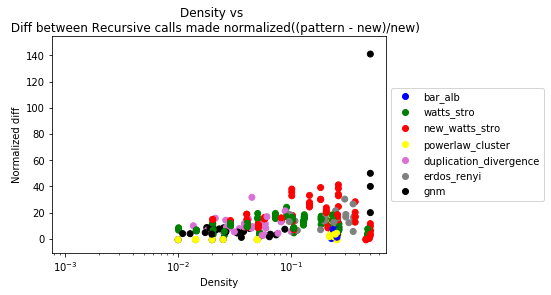

In [331]:
fig, ax = plt.subplots()

fig.suptitle('Density vs \n Diff between Recursive calls made normalized((pattern - new)/new)')
diff = list(map(lambda e: (e[0]-e[1]) / e[1], zip(calls_made_pattern, calls_made_new)))

ax.scatter(densities_new, diff, c=colors_new)
ax.set(xlabel='Density', ylabel='Normalized diff')
ax.set(xscale='log')
ax.set(ylim=(min(diff) - 10, max(diff) * 1.1))

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/normalized_recur_calls_diff_vs_density")

plt.show()

## Size vs Diff between Recursive calls made normalized((pattern - new)/new)

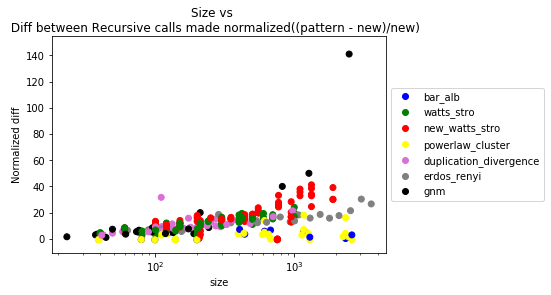

In [332]:
fig, ax = plt.subplots()

fig.suptitle('Size vs \n Diff between Recursive calls made normalized((pattern - new)/new)')
diff = list(map(lambda e: (e[0]-e[1]) / e[1], zip(calls_made_pattern, calls_made_new)))

ax.scatter(size_new, diff, c=colors_new)
ax.set(xlabel='size', ylabel='Normalized diff')
ax.set(xscale='log', ylim=(min(diff)-10, max(diff)*1.10))

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/normalized_recur_calls_diff_vs_size")

plt.show()

## Densities vs. Cliques received (workers -> master)

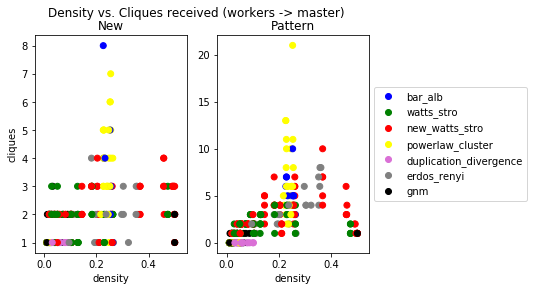

In [333]:
fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Density vs. Cliques received (workers -> master)')

# "New Algorithm"
ax_new.scatter(densities_new, count_of_cliques_received_new, c=colors_new)
ax_new.set(xlabel='density', ylabel='cliques')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.scatter(densities_pattern, count_of_cliques_received_pattern, c=colors_pattern)
ax_pattern.set(xlabel='density')
ax_pattern.set_title('Pattern')

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/density_cliques")

plt.show()

# Average degree vs. Cliques received (workers -> master)

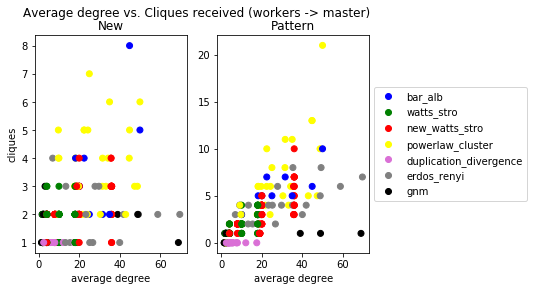

In [334]:

fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Average degree vs. Cliques received (workers -> master)')

# "New Algorithm"
ax_new.scatter(average_degree_new, count_of_cliques_received_new, c=colors_new)
ax_new.set(xlabel='average degree', ylabel='cliques')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.scatter(average_degree_pattern, count_of_cliques_received_pattern, c=colors_pattern)
ax_pattern.set(xlabel='average degree')
ax_pattern.set_title('Pattern')

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/average_degree_cliques")

plt.show()

## Size vs. Cliques received (workers -> master)

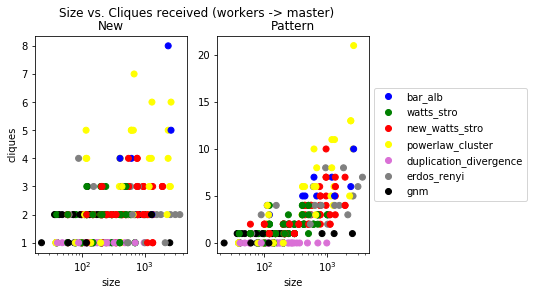

In [335]:
fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Size vs. Cliques received (workers -> master)')

# "New Algorithm"
ax_new.scatter(size_new, count_of_cliques_received_new, c=colors_new)
ax_new.set(xlabel='size', ylabel='cliques')
ax_new.set(xscale='log')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.scatter(size_pattern, count_of_cliques_received_pattern, c=colors_pattern)
ax_pattern.set(xlabel='size')
ax_pattern.set(xscale='log')
ax_pattern.set_title('Pattern')

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/size_cliques")

plt.show()

## Nodes vs. Cliques received (workers -> master)

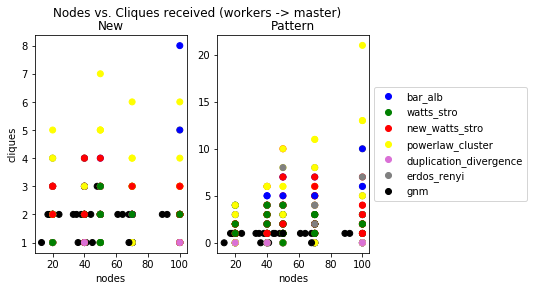

In [336]:
fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Nodes vs. Cliques received (workers -> master)')

# "New Algorithm"
ax_new.scatter(nodes_new, count_of_cliques_received_new, c=colors_new)
ax_new.set(xlabel='nodes', ylabel='cliques')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.scatter(nodes_pattern, count_of_cliques_received_pattern, c=colors_pattern)
ax_pattern.set(xlabel='nodes')
ax_pattern.set_title('Pattern')

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/nodes_cliques")

plt.show()

## Edges vs. Cliques received (workers -> master)

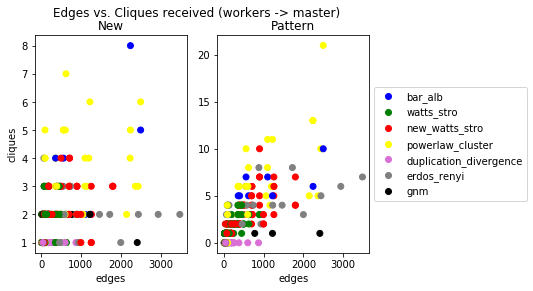

In [337]:
fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Edges vs. Cliques received (workers -> master)')

# "New Algorithm"
ax_new.scatter(edges_new, count_of_cliques_received_new, c=colors_new)
ax_new.set(xlabel='edges', ylabel='cliques')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.scatter(edges_pattern, count_of_cliques_received_pattern, c=colors_pattern)
ax_pattern.set(xlabel='edges')
ax_pattern.set_title('Pattern')

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/edges_cliques")

plt.show()

## Density vs. Time used

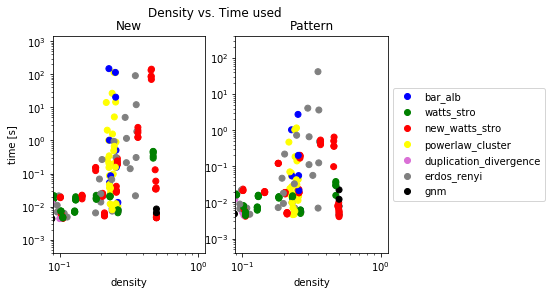

In [338]:
#
# Density vs. Time used
#

fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Density vs. Time used')

# "New Algorithm"
ax_new.scatter(densities_new, time_new, c=colors_new)
ax_new.set(xlabel='density', ylabel='time [s]')
ax_new.set(xscale='log', yscale='log', ylim=(min(time_new)/10, max(time_new)*10))
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.scatter(densities_pattern, time_pattern, c=colors_pattern)
ax_pattern.set(xlabel='density')
ax_pattern.set(xscale='log', yscale='log', ylim=(min(time_pattern)/10, max(time_pattern)*10))
ax_pattern.set_title('Pattern')

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/density_time")

plt.show()

# Average degree vs. Time used

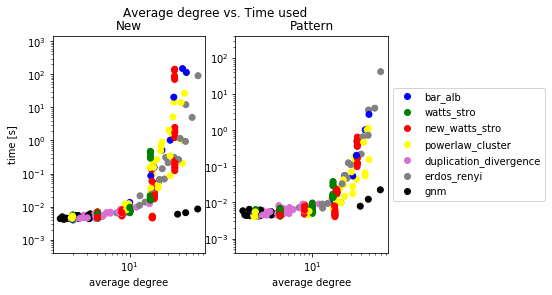

In [339]:

fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Average degree vs. Time used')

# "New Algorithm"
ax_new.scatter(average_degree_new, time_new, c=colors_pattern)
ax_new.set(xlabel='average degree', ylabel='time [s]')
ax_new.set(xscale='log', yscale='log', ylim=(min(time_new)/10, max(time_new)*10))
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.scatter(average_degree_pattern, time_pattern, c=colors_new)
ax_pattern.set(xlabel='average degree')
ax_pattern.set(xscale='log', yscale='log', ylim=(min(time_pattern)/10, max(time_pattern)*10))
ax_pattern.set_title('Pattern')

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/average_degree_time")

plt.show()

## Size vs. Time used

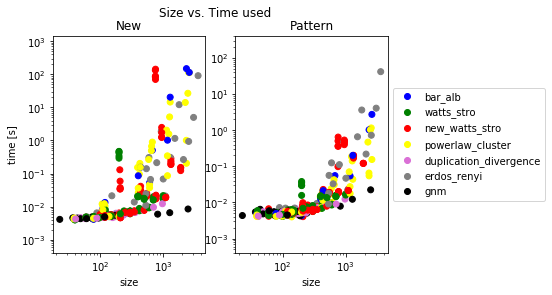

In [340]:
fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Size vs. Time used')

# "New Algorithm"
ax_new.scatter(size_new, time_new, c=colors_new)
ax_new.set(xlabel='size', ylabel='time [s]')
ax_new.set(xscale='log', yscale='log', ylim=(min(time_new)/10, max(time_new)*10))
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.scatter(size_pattern, time_pattern, c=colors_pattern)
ax_pattern.set(xlabel='size')
ax_pattern.set(xscale='log', yscale='log', ylim=(min(time_pattern)/10, max(time_pattern)*10))
ax_pattern.set_title('Pattern')

plt.legend(fake_markers_for_legend, dictionary_of_colors.keys(), numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/size_time")

plt.show()